In [1]:
import pandas as pd 
import scipy.interpolate
import math
from math import sin, tan, cos, ceil, exp
import forallpeople as fp
fp.environment('structural', top_level= True)
import handcalcs.render

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">1. Datos de Disen&#771;o</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan los datos entregados por el cliente, para el diseño de un Boxculvert:
    
</p>
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.1 Datos del terreno</font>
</p>
<p style="font-family:'Cambria';font-size:20px">   </p>


</body>
</html>

In [2]:
%%render 2 
Hrelleno = (1.5*m) # Altura de relleno

<IPython.core.display.Latex object>

In [3]:
%%render 2
gamma = (18*kN/m**3) #Peso especifico
Phi = (28) #Ángulo de fricción


<IPython.core.display.Latex object>

In [4]:
%%render 2
sigma_adm = (150*kN/m**2) # Esfuerzo admisible

<IPython.core.display.Latex object>

In [5]:
%%render 2 params
kb = 34500*kN/m**3

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.2 Datos de la geometría</font>
</p>

In [6]:
%%render 2 long
B = (4*m)
H = (3*m)
r = (7*cm) #Recubrimiento

<IPython.core.display.Latex object>

In [7]:
%%render 2 params
celdas = 2

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">2. Predimensionamiento de la estructura.</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.1 Predimensionamiento de la losa superior.</font>
    
</h2>
<p style="font-family:'Cambria';font-size:20px">
    Se predimensiona, siguiendo la tabla 2.5.2.6.3-1 del CCP-2014
    
</p>
    
</body>
</html>

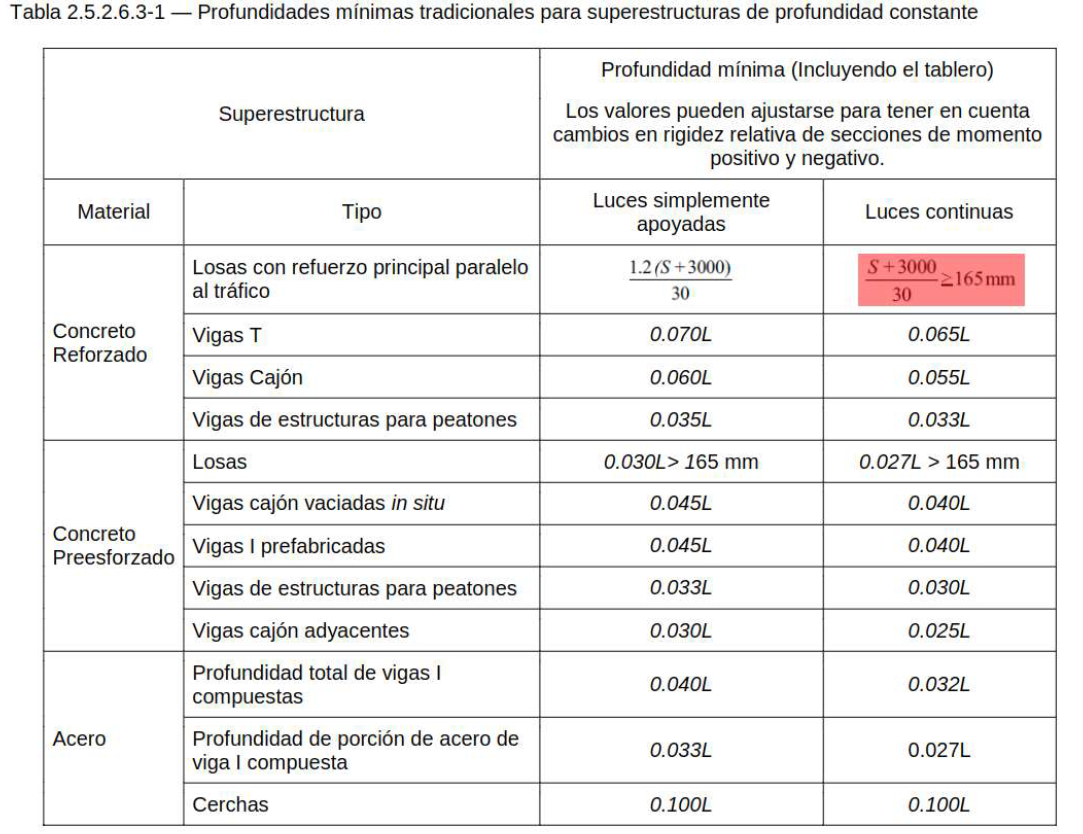

In [8]:
%%render 2
H_sup = (B+3000*mm)/30

<IPython.core.display.Latex object>

In [9]:
%%render 2 params

H_sup = ceil(H_sup/cm)*cm

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.2 Predimensionamiento de espesor de muros.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Seguimos la tabla 36.5-1 del WisDOT bridge manual:
    
</p>
    
</body>
</html>

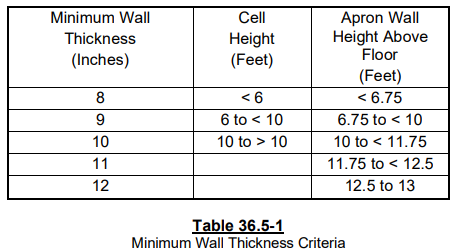

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a la altura de muro de 3 metros el espesor mínimo de muro es de 9 pulgadas.
    
</p>
    
</body>
</html>

In [10]:
%%render 1 params
e_m = .25*m

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.3 Predimensionamiento de losa inferior.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Haciendo uso de manual de diseño LFRD Bridge design:
    
</p>
    
</body>
</html>

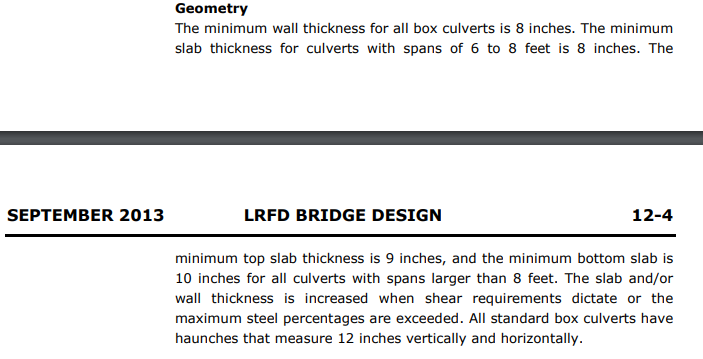

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a que la luz es mayor a 8 pulgadas, la altura mínima para la losa inferior es de 10 pulgadas.
    
</p>
    
</body>
</html>

In [11]:
%%render 1 params

H_inf = 250*mm

<IPython.core.display.Latex object>

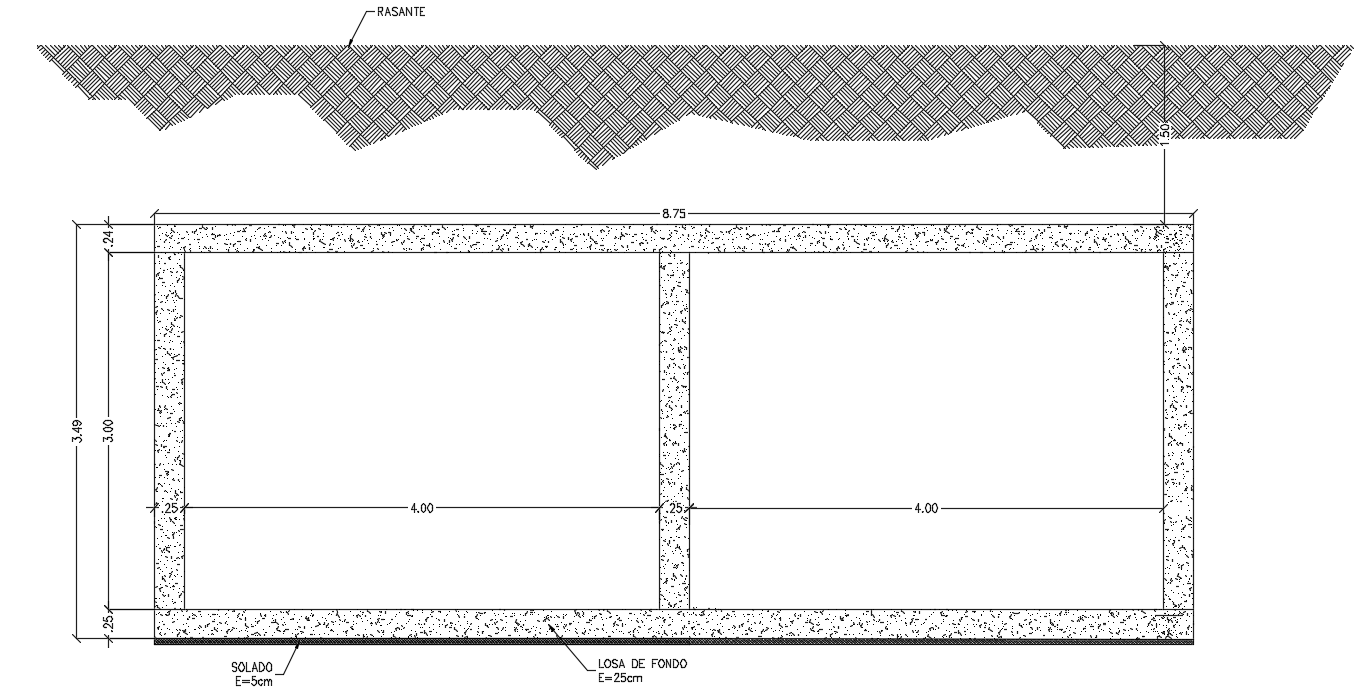

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">3. Análisis de cargas muertas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">3.1 Presión horizontal de suelo</font>
    
</h2>
    
</body>
</html>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.1 Coeficientes de presión</font>
</p>

In [12]:
%%render 2
K_0 = 1-sin(Phi)
K_a = tan(45-Phi/2)**2

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.2 Presión horizontal</font>
</p>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">El valor del coeficiente K se toma como el más crítico entre el coeficiente de reposo y el coeficiente activo:</font>
</p>

In [13]:
%%render 2
k = max(K_0, K_a)

<IPython.core.display.Latex object>

In [14]:
%%render 2 long
E_H_min = k*gamma*Hrelleno*1*m
E_H_max = k*gamma*(Hrelleno+H+H_sup+H_inf)*1*m


<IPython.core.display.Latex object>

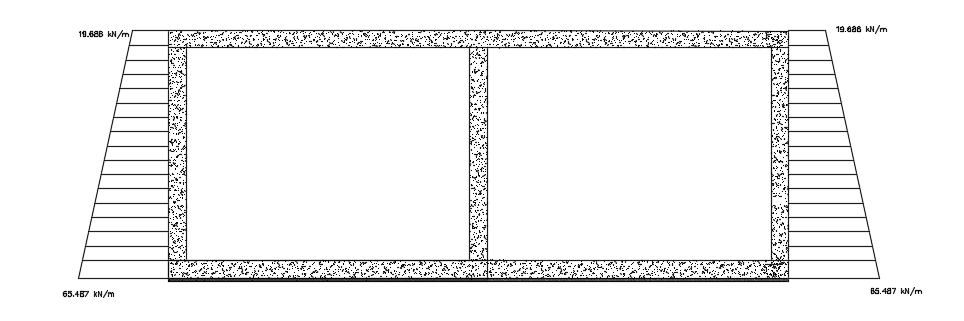

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.2 Presión hidrostática</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se cálcula las cargas producidas por el agua:</font>
</p>

    
</body>
</html>

In [15]:
%%render 2 params
gamma_W = 9.81*kN/m**3

<IPython.core.display.Latex object>

In [16]:
%%render 2 long
P_W1 = gamma_W*H*1*m # Carga lateral de agua



<IPython.core.display.Latex object>

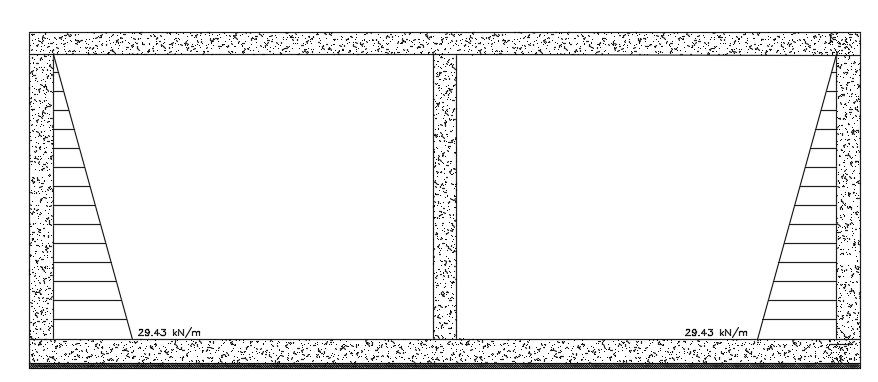

In [17]:
%%render 2
P_W2 = gamma_W*B*1*m # Carga vertical de agua

<IPython.core.display.Latex object>

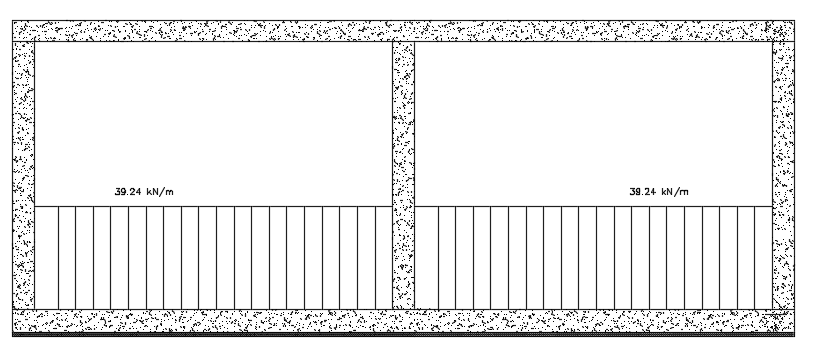

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3H_su.3 Presión lateral por sobrecarga viva</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se determina el efecto horizontal que tiene la sobrecarga viva en la estructura:</font>
</p>

    
</body>
</html>

In [18]:
y = [1200, 900, 600]
x = [1500, 3000, 6000]

In [19]:
y_interp = scipy.interpolate.interp1d(x, y)


In [20]:
%%render 1 params
h_eq_max = y_interp(H/mm)*mm
h_eq_min = y_interp((H+Hrelleno+H_sup+H_inf)/mm)*mm

<IPython.core.display.Latex object>

In [21]:
%%render 2 long
L_S_max = k*gamma*h_eq_max*1*m
L_S_min = k*gamma*h_eq_min*1*m

<IPython.core.display.Latex object>

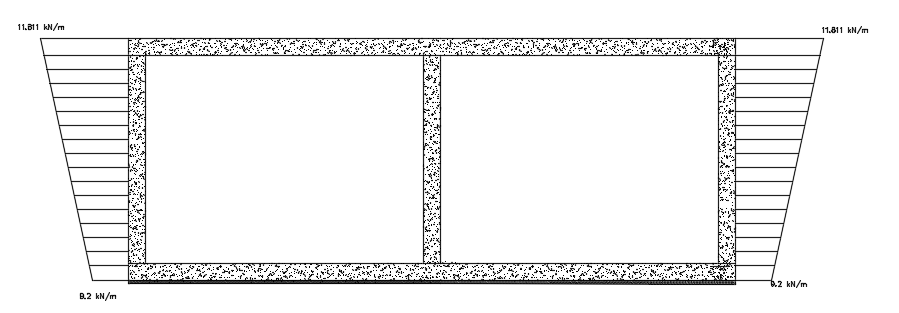

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.4 Presión vertical del terreno</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se calcula el peso del terreno sobre la estructura, para una instalación en zanja:</font>
</p>

    
</body>
</html>

In [22]:
%%render 2 params
B_c = 2*B+3*e_m
B_d = B_c+2*m

<IPython.core.display.Latex object>

In [23]:
%%render 2 
n =  Hrelleno/B_d


<IPython.core.display.Latex object>

In [24]:
%%render 4

K_u_prime = 0.1924

<IPython.core.display.Latex object>

In [25]:
%%render 4 long

C_d = (1-exp(-2*K_u_prime*n))/(2*K_u_prime)

<IPython.core.display.Latex object>

In [26]:
%%render 2 long

F_t = (C_d*B_d**2)/(Hrelleno*B)

F_e = 1+0.2*Hrelleno/B

<IPython.core.display.Latex object>

In [27]:
%%render 2

E_V = F_e*gamma*Hrelleno*1*m

<IPython.core.display.Latex object>

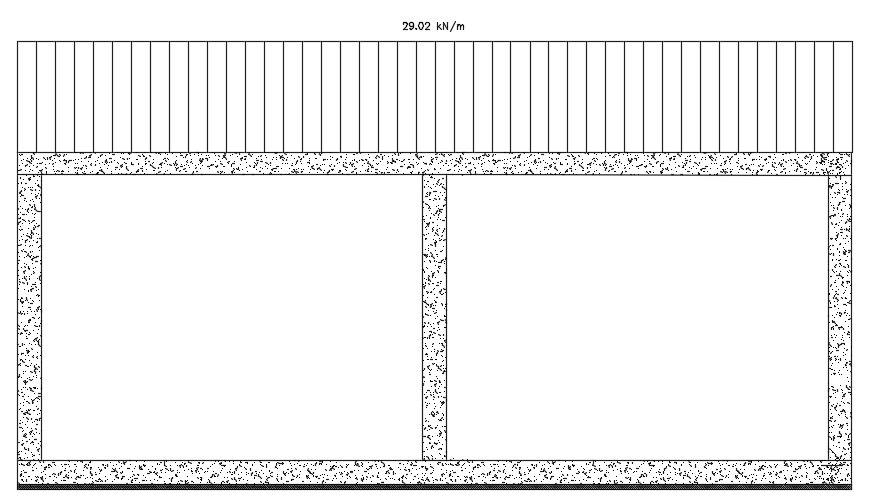

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">4. Análisis de cargas vivas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas vivas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">4.1 Distribución de la carga viva montada en la parte superior</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.1 Tráfico transversal al tramo.</font>
</p>
    
</body>
</html>

In [28]:
%%render 3

S_w = (1828*mm)


<IPython.core.display.Latex object>

In [29]:
%%render 1
W_t = (500*mm)
D_i = B

<IPython.core.display.Latex object>

In [30]:
%%render 2

LLDF = 1.15

<IPython.core.display.Latex object>

In [31]:
%%render 1
H_int_t = (S_w-W_t-0.06*D_i)/LLDF

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.2 Área de distribución para Tandem.</font>
</p>
    
</body>
</html>

In [32]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_at = (1.2*m)
L_w = L_t+S_at+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [33]:
IM = IM/100

In [34]:
%%render 2

PL_t = (125*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.3 Área de distribución para Camión.</font>
</p>
    
</body>
</html>

In [35]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_ac = (4.3*m)
L_w = L_t+S_ac+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [36]:
IM = IM/100

In [37]:
%%render 2

PL_c = (160*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Finalmente, se escoge el mayor resultado, para la carga viva.</font>
</p>
    
</body>
</html>

In [38]:
%%render 2
PL = max(PL_t,PL_c)

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">5. Análisis estructural mediante SAP2000</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario modelar las cargas obtenidas en el programa de SAP2000, para determinar los esfuerzos soportados por la estructura.
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.1 Resumen de cargas</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Para ingresar los datos, se organizan los mismos dentro de una tabla.</font>
</p>
    
</body>
</html>

In [39]:
resumen = pd.DataFrame(columns=['Cargas'], index=['Ev', 'EH(min)', 'EH(max)',
                                                  'WA1','WA2', 'Ls(min)', 'Ls(max)', 'PL'])
resumen.iloc[0,0] = E_V
resumen.iloc[1,0] = E_H_min
resumen.iloc[2,0] = E_H_max
resumen.iloc[3,0] = P_W1
resumen.iloc[4,0] = P_W2
resumen.iloc[5,0] = L_S_min
resumen.iloc[6,0] = L_S_max
resumen.iloc[7,0] = PL
resumen

,Cargas
Ev,29.025 kN/m
EH(min),19.686 kN/m
EH(max),65.487 kN/m
WA1,29.430 kN/m
WA2,39.240 kN/m
Ls(min),9.200 kN/m
Ls(max),11.811 kN/m
PL,12.403 kN/m
